In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing


In [17]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
names=['Sex','Length','Diameter','Height','Whole_weight','Shucked_weight','Viscera_weight','Shell_weight','Rings']

df=pd.read_csv(url,names=names)



In [18]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [11]:
df.tail()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [12]:
df.shape

(4177, 9)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole_weight      4177 non-null float64
Shucked_weight    4177 non-null float64
Viscera_weight    4177 non-null float64
Shell_weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [21]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole_weight      False
Shucked_weight    False
Viscera_weight    False
Shell_weight      False
Rings             False
dtype: bool

In [22]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [40]:
le = preprocessing.LabelEncoder()
df['Sex_code']=le.fit_transform(df['Sex'])

In [41]:
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_code
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [43]:
df=df.drop(['Sex'],1)

In [44]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Sex_code
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


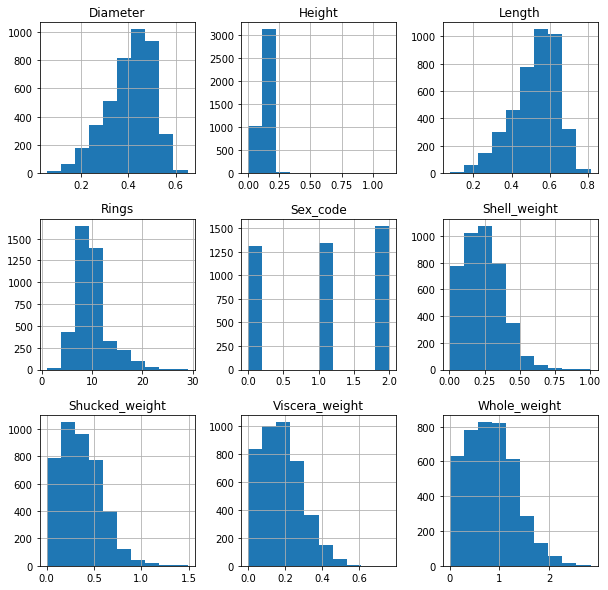

In [45]:
df.hist(figsize=(10,10))
plt.show()

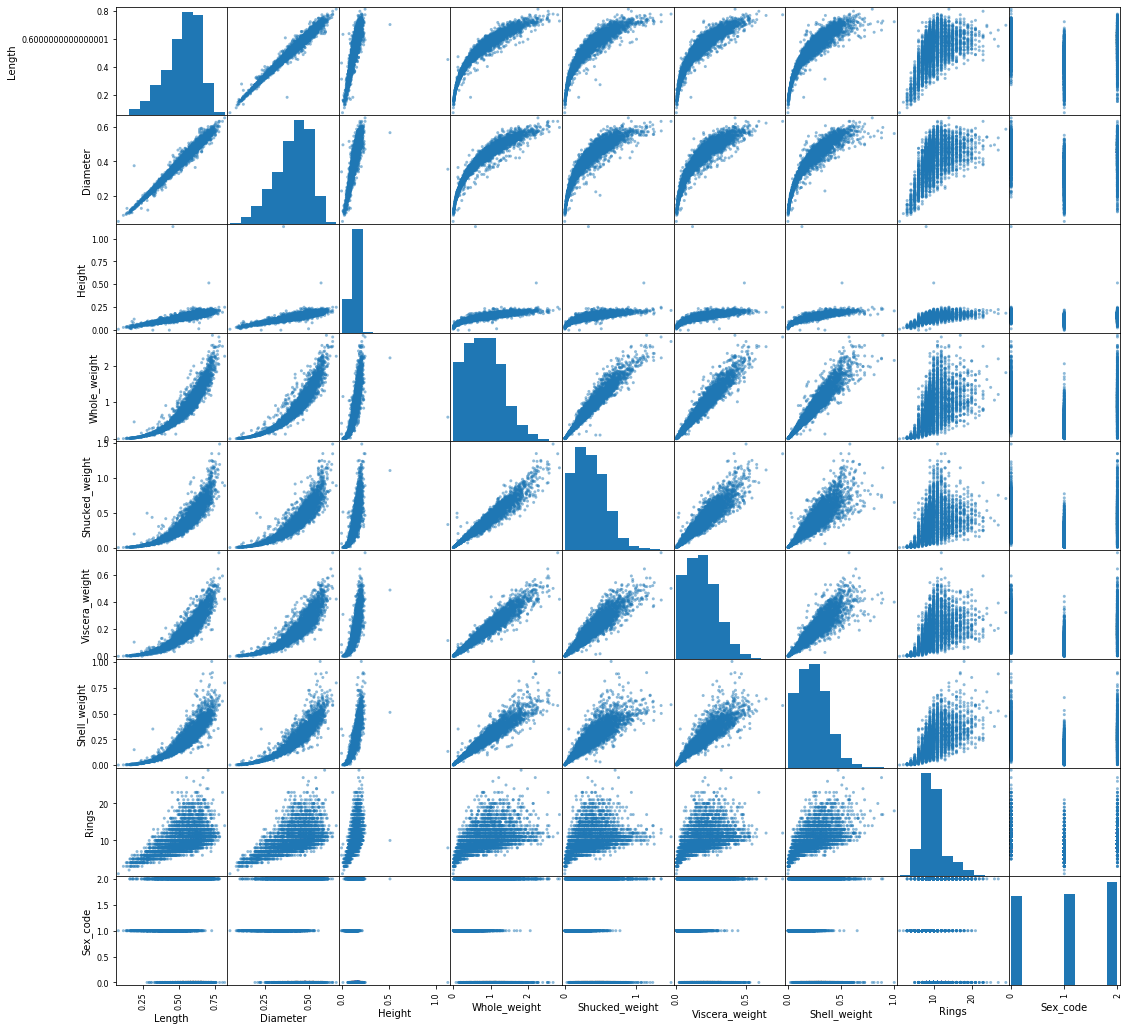

In [46]:
scatter_matrix(df,figsize=(18,18))
plt.show()

In [71]:
X=np.array(df.drop(['Rings'],1))
y=np.array(df['Rings'])
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [72]:
X_train.shape

(3132, 8)

In [73]:
X_test.shape

(1045, 8)

In [74]:
seed=8
scoring='accuracy'

In [114]:
clf=KNeighborsClassifier(n_neighbors=19)
clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=19, p=2,
           weights='uniform')

In [115]:
kfold=model_selection.KFold(n_splits=10,random_state=seed)
cv_results=model_selection.cross_val_score(clf,X_train,y_train,cv=kfold,scoring=scoring)

In [116]:
msg="%s: %f (%f)" % ("KNN",cv_results.mean(),cv_results.std())
print(msg)

KNN: 0.264370 (0.016553)


In [117]:
predictions=clf.predict(X_test)
print("Accuracy of KNN Classifier:",accuracy_score(y_test,predictions))
print("\n\nClassification Report:\n",classification_report(y_test,predictions))

Accuracy of KNN Classifier: 0.2736842105263158


Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.50      0.41      0.45        17
           5       0.24      0.30      0.26        30
           6       0.26      0.28      0.27        58
           7       0.34      0.26      0.29       101
           8       0.37      0.41      0.39       144
           9       0.26      0.41      0.31       178
          10       0.25      0.37      0.30       161
          11       0.23      0.23      0.23       124
          12       0.17      0.06      0.09        63
          13       0.17      0.06      0.09        52
          14       0.00      0.00      0.00        22
          15       0.00      0.00      0.00        22
          16       0.50      0.13      0.21        15
          17       0.00      0.00      0.00        17
        

C:\Users\shuddhatm\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
